# Progress 3: Exploratory Data Analysis

---

**Course:** SECB3203 Programming for Bioinformatics  
**Project:** Early Detection of Parkinson's Disease Using Machine Learning  
**Section:** 02

---

**Group Members:**

| Name | Matric Number |
|------|---------------|
| MUHAMMAD AMIRUN IRFAN BIN SAMSUL SHAH | A23CS0121 |
| MUHAMMAD HAFIZ BIN MOHD SHAHARUDDIN | A23CS0130 |
| MUHAMMAD ZAFRIL IHSAN BIN MOHAMAD NASIR | A23CS0304 |

---

## Table of Contents

1. Introduction
2. Importing Libraries and Dataset
3. Descriptive Statistics
4. Data Visualization
5. Grouping Analysis
6. Correlation Analysis
7. ANOVA Test
8. Key Findings and Conclusion

---
## 1. Introduction
---

Exploratory Data Analysis (EDA) is a critical step in the data science pipeline that involves examining and summarizing the main characteristics of a dataset. The primary objective of this analysis is to understand the underlying patterns, detect anomalies, and identify relationships between variables before proceeding with model development.

In this progress report, we conduct a comprehensive EDA on the Parkinson's disease dataset, which contains voice measurements from 195 subjects. The analysis includes descriptive statistics, data visualization, group comparisons, correlation analysis, and Analysis of Variance (ANOVA) tests to determine which features exhibit statistically significant differences between healthy individuals and those diagnosed with Parkinson's disease.

The findings from this analysis will inform the feature selection process and guide the development of machine learning models in subsequent stages of the project.

---
## 2. Importing Libraries and Dataset
---

The following libraries are utilized for data manipulation, statistical analysis, and visualization throughout this analysis.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, ttest_ind, pearsonr, spearmanr
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load the dataset
df = pd.read_csv('Parkinsson_disease.csv')

# Remove the 'name' column as it is not relevant for analysis
df = df.drop(columns=['name'])

print("Dataset loaded successfully.")
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded successfully.
Dataset dimensions: 195 rows and 23 columns


In [3]:
# Display the first few rows of the dataset
print("Preview of the dataset:")
df.head()

Preview of the dataset:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.9920,157.3020,74.9970,0.0078,0.0001,0.0037,0.0055,0.0111,0.0437,0.4260,0.0218,0.0313,0.0297,0.0654,0.0221,21.0330,1,0.4148,0.8153,-4.8130,0.2665,2.3014,0.2847
1,122.4000,148.6500,113.8190,0.0097,0.0001,0.0046,0.0070,0.0139,0.0613,0.6260,0.0313,0.0452,0.0437,0.0940,0.0193,19.0850,1,0.4584,0.8195,-4.0752,0.3356,2.4869,0.3687
2,116.6820,131.1110,111.5550,0.0105,0.0001,0.0054,0.0078,0.0163,0.0523,0.4820,0.0276,0.0386,0.0359,0.0827,0.0131,20.6510,1,0.4299,0.8253,-4.4432,0.3112,2.3423,0.3326
3,116.6760,137.8710,111.3660,0.0100,0.0001,0.0050,0.0070,0.0150,0.0549,0.5170,0.0292,0.0401,0.0377,0.0877,0.0135,20.6440,1,0.4350,0.8192,-4.1175,0.3341,2.4056,0.3690
4,116.0140,141.7810,110.6550,0.0128,0.0001,0.0066,0.0091,0.0197,0.0643,0.5840,0.0349,0.0483,0.0447,0.1047,0.0177,19.6490,1,0.4174,0.8235,-3.7478,0.2345,2.3322,0.4103


---
## 3. Descriptive Statistics
---

Descriptive statistics provide a summary of the central tendency, dispersion, and distribution shape of the dataset. This section presents statistical measures including mean, standard deviation, minimum, maximum, and quartile values for all numerical features.

### 3.1 Overall Statistical Summary

In [4]:
# Generate descriptive statistics for all features
descriptive_stats = df.describe().T
descriptive_stats['variance'] = df.var()
descriptive_stats['skewness'] = df.skew()
descriptive_stats['kurtosis'] = df.kurtosis()

print("Descriptive Statistics for All Features:")
print("="*80)
descriptive_stats.round(4)

Descriptive Statistics for All Features:


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
MDVP:Fo(Hz),195.0000,154.2286,41.3901,88.3330,117.5720,148.7900,182.7690,260.1050,1713.1375,0.5917,-0.6279
MDVP:Fhi(Hz),195.0000,197.1049,91.4915,102.1450,134.8625,175.8290,224.2055,592.0300,8370.7033,2.5421,7.6272
MDVP:Flo(Hz),195.0000,116.3246,43.5214,65.4760,84.2910,104.3150,140.0185,239.1700,1894.1134,1.2174,0.6546
MDVP:Jitter(%),195.0000,0.0062,0.0048,0.0017,0.0035,0.0049,0.0074,0.0332,0.0000,3.0849,12.0309
MDVP:Jitter(Abs),195.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0003,0.0000,2.6491,10.8690
MDVP:RAP,195.0000,0.0033,0.0030,0.0007,0.0017,0.0025,0.0038,0.0214,0.0000,3.3607,14.2138
MDVP:PPQ,195.0000,0.0034,0.0028,0.0009,0.0019,0.0027,0.0040,0.0196,0.0000,3.0739,11.9639
Jitter:DDP,195.0000,0.0099,0.0089,0.0020,0.0050,0.0075,0.0115,0.0643,0.0001,3.3621,14.2248
MDVP:Shimmer,195.0000,0.0297,0.0189,0.0095,0.0165,0.0230,0.0379,0.1191,0.0004,1.6665,3.2383
MDVP:Shimmer(dB),195.0000,0.2823,0.1949,0.0850,0.1485,0.2210,0.3500,1.3020,0.0380,1.9994,5.1282


### 3.2 Target Variable Distribution

The target variable 'status' indicates whether a subject has Parkinson's disease (1) or is healthy (0). Understanding its distribution is essential for assessing class imbalance.

In [5]:
# Analyze target variable distribution
status_distribution = df['status'].value_counts()
status_percentage = df['status'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print("="*50)
print(f"Parkinson's Disease (status=1): {status_distribution[1]} subjects ({status_percentage[1]:.2f}%)")
print(f"Healthy (status=0): {status_distribution[0]} subjects ({status_percentage[0]:.2f}%)")
print(f"\nClass Imbalance Ratio: {status_distribution[1]/status_distribution[0]:.2f}:1")

Target Variable Distribution:
Parkinson's Disease (status=1): 147 subjects (75.38%)
Healthy (status=0): 48 subjects (24.62%)

Class Imbalance Ratio: 3.06:1


### 3.3 Statistical Summary by Group

To understand the differences between healthy subjects and those with Parkinson's disease, we compute separate descriptive statistics for each group.

In [6]:
# Separate data by status
df_healthy = df[df['status'] == 0]
df_parkinsons = df[df['status'] == 1]

print(f"Number of healthy subjects: {len(df_healthy)}")
print(f"Number of Parkinson's subjects: {len(df_parkinsons)}")

Number of healthy subjects: 48
Number of Parkinson's subjects: 147


In [7]:
# Compute mean values for each group
comparison_df = pd.DataFrame({
    'Healthy_Mean': df_healthy.mean(),
    'Parkinsons_Mean': df_parkinsons.mean(),
    'Difference': df_parkinsons.mean() - df_healthy.mean(),
    'Percent_Difference': ((df_parkinsons.mean() - df_healthy.mean()) / df_healthy.mean() * 100)
})

# Remove status row
comparison_df = comparison_df.drop('status', errors='ignore')

print("Comparison of Mean Values Between Groups:")
print("="*80)
comparison_df.round(4)

Comparison of Mean Values Between Groups:


,Healthy_Mean,Parkinsons_Mean,Difference,Percent_Difference
MDVP:Fo(Hz),181.9378,145.1808,-36.7570,-20.2031
MDVP:Fhi(Hz),223.6368,188.4415,-35.1953,-15.7377
MDVP:Flo(Hz),145.2073,106.8936,-38.3137,-26.3855
MDVP:Jitter(%),0.0039,0.0070,0.0031,80.7857
MDVP:Jitter(Abs),0.0000,0.0001,0.0000,116.8140
MDVP:RAP,0.0019,0.0038,0.0018,95.1939
MDVP:PPQ,0.0021,0.0039,0.0018,89.7014
Jitter:DDP,0.0058,0.0113,0.0055,95.1693
MDVP:Shimmer,0.0176,0.0337,0.0160,91.0745
MDVP:Shimmer(dB),0.1630,0.3212,0.1582,97.1081


---
## 4. Data Visualization
---

Visual representations of data provide intuitive insights into the distribution patterns and relationships between variables. This section presents various visualizations to explore the dataset characteristics.

### 4.1 Target Variable Distribution Visualization

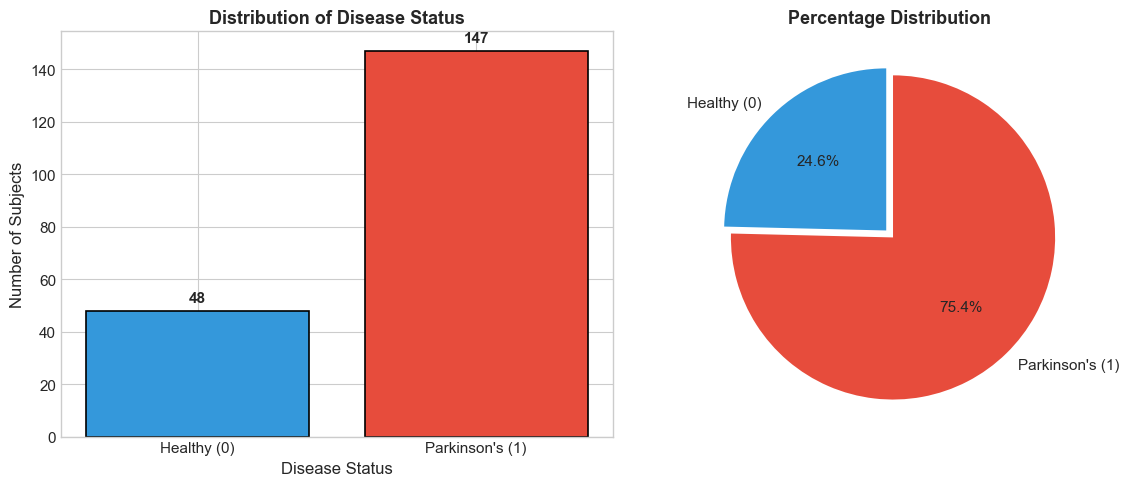

Figure saved: EDA_01_target_distribution.png


In [8]:
# Create figure for target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
colors = ['#3498db', '#e74c3c']
bars = axes[0].bar(['Healthy (0)', "Parkinson's (1)"], 
                   [status_distribution[0], status_distribution[1]], 
                   color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Disease Status', fontsize=12)
axes[0].set_ylabel('Number of Subjects', fontsize=12)
axes[0].set_title('Distribution of Disease Status', fontsize=13, fontweight='bold')

# Add value labels on bars
for bar, count in zip(bars, [status_distribution[0], status_distribution[1]]):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                 str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie([status_distribution[0], status_distribution[1]], 
            labels=['Healthy (0)', "Parkinson's (1)"],
            autopct='%1.1f%%', colors=colors, explode=[0.03, 0.03],
            shadow=False, startangle=90,
            textprops={'fontsize': 11})
axes[1].set_title('Percentage Distribution', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('EDA_01_target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_01_target_distribution.png")

### 4.2 Feature Distribution Analysis

Histogram plots are generated for key features to examine their distribution patterns across both groups.

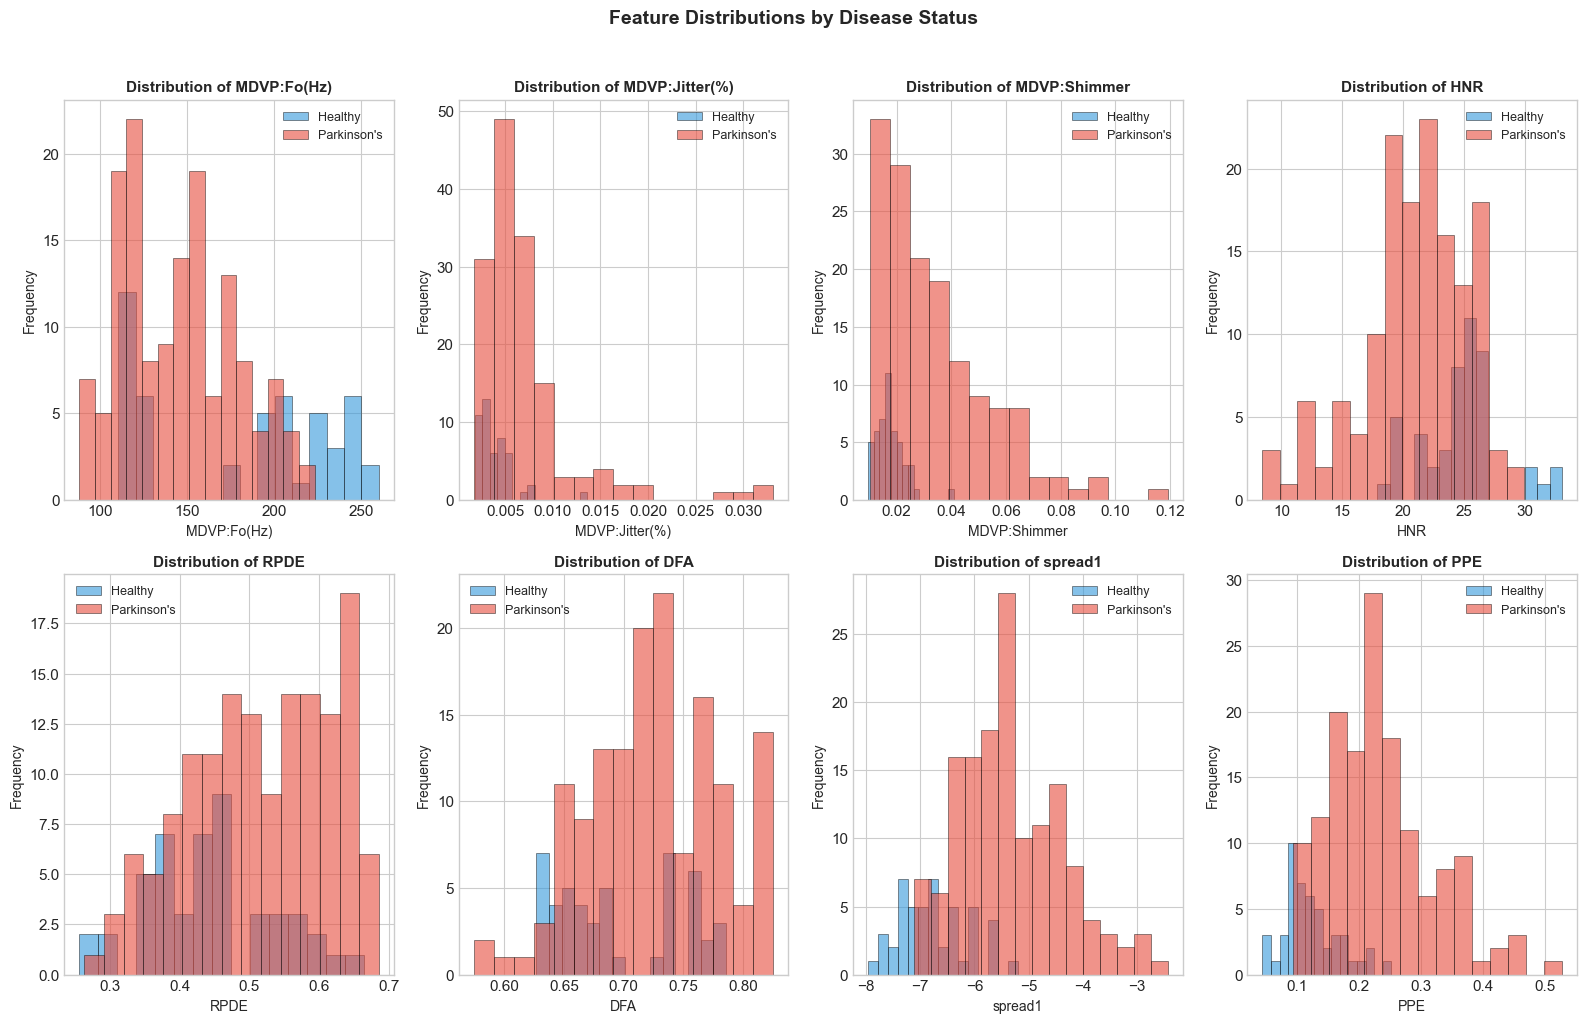

Figure saved: EDA_02_feature_distributions.png


In [9]:
# Select key features for visualization
key_features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'HNR', 'RPDE', 'DFA', 'spread1', 'PPE']

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    ax = axes[i]
    
    # Plot histograms for each group
    ax.hist(df_healthy[feature], bins=15, alpha=0.6, label='Healthy', 
            color='#3498db', edgecolor='black', linewidth=0.5)
    ax.hist(df_parkinsons[feature], bins=15, alpha=0.6, label="Parkinson's", 
            color='#e74c3c', edgecolor='black', linewidth=0.5)
    
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)

plt.suptitle('Feature Distributions by Disease Status', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('EDA_02_feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_02_feature_distributions.png")

### 4.3 Box Plot Analysis

Box plots provide a visual representation of the data distribution, including median, quartiles, and potential outliers for each group.

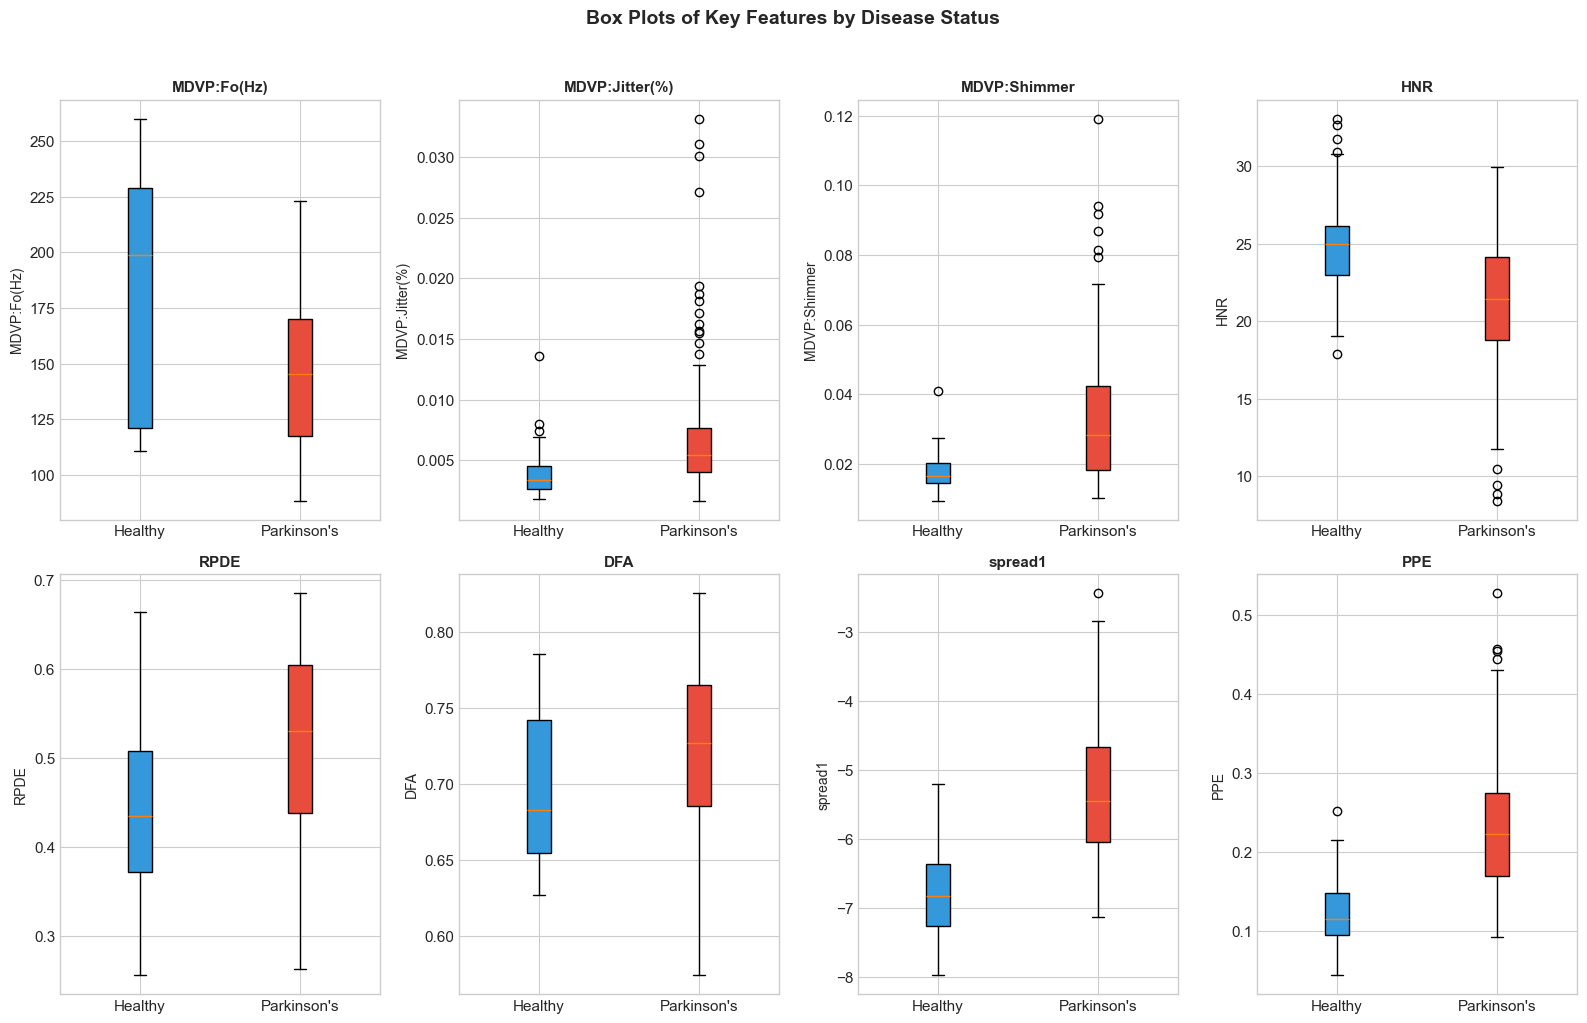

Figure saved: EDA_03_boxplots.png


In [10]:
# Create box plots for key features
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    ax = axes[i]
    
    # Prepare data for box plot
    data_to_plot = [df_healthy[feature], df_parkinsons[feature]]
    bp = ax.boxplot(data_to_plot, labels=['Healthy', "Parkinson's"], patch_artist=True)
    
    # Set colors
    bp['boxes'][0].set_facecolor('#3498db')
    bp['boxes'][1].set_facecolor('#e74c3c')
    
    ax.set_ylabel(feature, fontsize=10)
    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')

plt.suptitle('Box Plots of Key Features by Disease Status', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('EDA_03_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_03_boxplots.png")

### 4.4 Violin Plot Analysis

Violin plots combine box plots with kernel density estimation to provide a richer visualization of the data distribution.

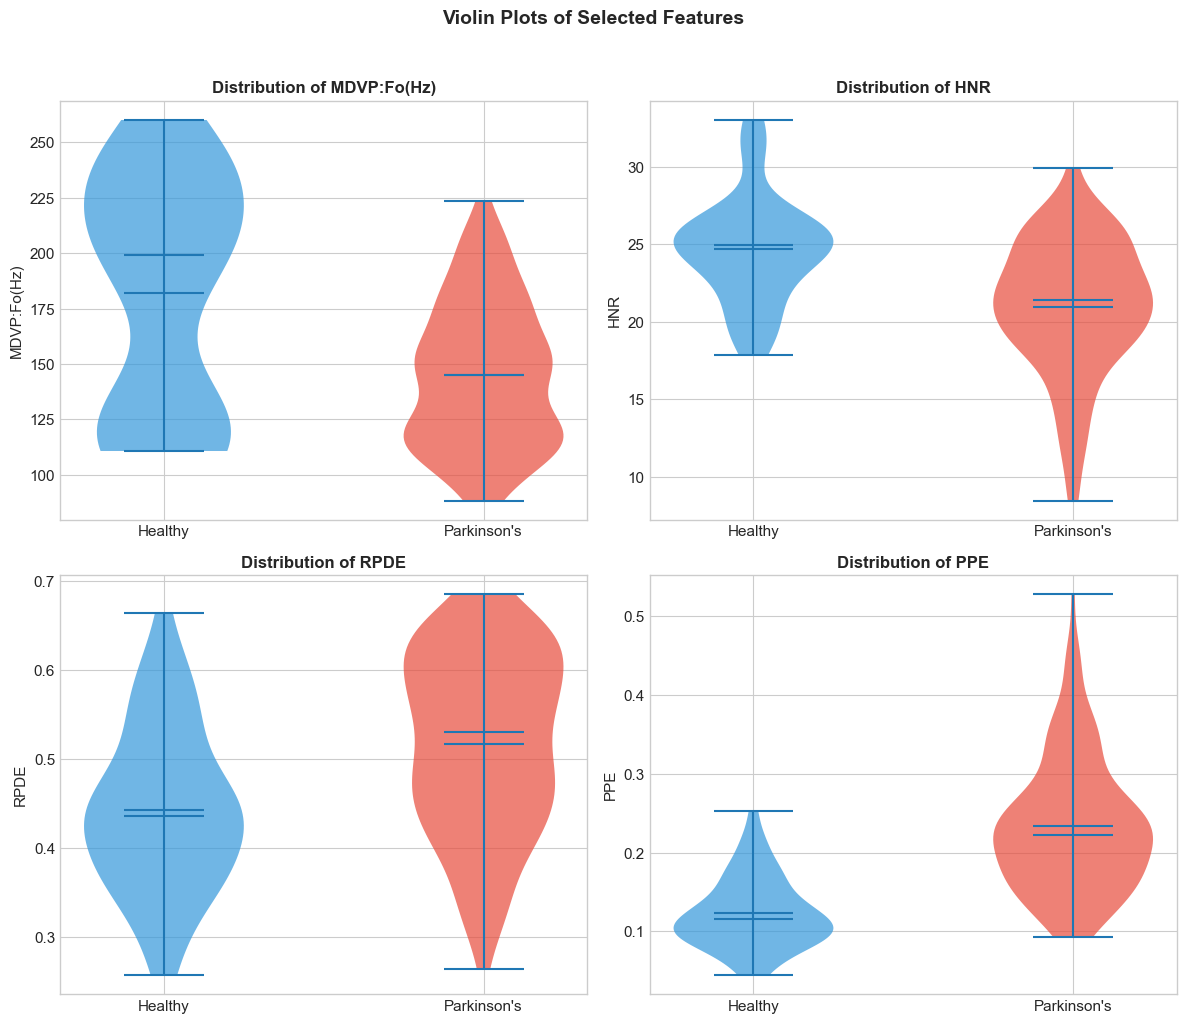

Figure saved: EDA_04_violinplots.png


In [11]:
# Create violin plots for selected features
selected_features = ['MDVP:Fo(Hz)', 'HNR', 'RPDE', 'PPE']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    ax = axes[i]
    
    # Create violin plot
    parts = ax.violinplot([df_healthy[feature], df_parkinsons[feature]], 
                          positions=[0, 1], showmeans=True, showmedians=True)
    
    # Set colors
    colors = ['#3498db', '#e74c3c']
    for j, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[j])
        pc.set_alpha(0.7)
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Healthy', "Parkinson's"])
    ax.set_ylabel(feature, fontsize=11)
    ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')

plt.suptitle('Violin Plots of Selected Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('EDA_04_violinplots.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_04_violinplots.png")

---
## 5. Grouping Analysis
---

Grouping analysis allows us to aggregate and compare data based on categorical variables. In this section, we analyze the features grouped by disease status to identify distinguishing characteristics.

### 5.1 Group Statistics Using groupby()

In [12]:
# Group data by status and compute statistics
grouped_stats = df.groupby('status').agg(['mean', 'std', 'min', 'max'])

print("Grouped Statistics by Disease Status:")
print("="*80)
print("\nStatus 0 = Healthy, Status 1 = Parkinson's Disease")
grouped_stats.round(4)

Grouped Statistics by Disease Status:

Status 0 = Healthy, Status 1 = Parkinson's Disease


MDVP:Fo(Hz)                           MDVP:Fhi(Hz)                   \
              mean     std      min      max         mean     std      min   
status                                                                       
0         181.9378 52.7311 110.7390 260.1050     223.6368 96.7271 113.5970   
1         145.1808 32.3480  88.3330 223.3610     188.4415 88.3392 102.1450   

                MDVP:Flo(Hz)                          MDVP:Jitter(%)         \
            max         mean     std     min      max           mean    std   
status                                                                        
0      592.0300     145.2073 58.7571 74.2870 239.1700         0.0039 0.0021   
1      588.5180     106.8936 32.2744 65.4760 199.0200         0.0070 0.0052   

                     MDVP:Jitter(Abs)                      MDVP:RAP         \
          min    max             mean    std    min    max     mean    std   
status                                                                       
0      0.0018 0.0136           0.0000 0.0000 0.0000 0.0001   0.0019 0.0011   
1      0.0017 0.0332           0.0001 0.0000 0.0000 0.0003   0.0038 0.0032   

                     MDVP:PPQ                      Jitter:DDP                \
          min    max     mean    std    min    max       mean    std    min   
status                                                                        
0      0.0009 0.0062   0.0021 0.0009 0.0011 0.0056     0.0058 0.0032 0.0028   
1      0.0007 0.0214   0.0039 0.0030 0.0009 0.0196     0.0113 0.0097 0.0020   

              MDVP:Shimmer                      MDVP:Shimmer(dB)         \
          max         mean    std    min    max             mean    std   
status                                                                    
0      0.0187       0.0176 0.0055 0.0095 0.0409           0.1630 0.0578   
1      0.0643       0.0337 0.0200 0.0102 0.1191           0.3212 0.2078   

                     Shimmer:APQ3                      Shimmer:APQ5         \
          min    max         mean    std    min    max         mean    std   
status                                                                       
0      0.0850 0.4050       0.0095 0.0035 0.0047 0.0234       0.0105 0.0032   
1      0.0900 1.3020       0.0177 0.0108 0.0046 0.0565       0.0203 0.0128   

                     MDVP:APQ                      Shimmer:DDA                \
          min    max     mean    std    min    max        mean    std    min   
status                                                                         
0      0.0061 0.0250   0.0133 0.0038 0.0072 0.0274      0.0285 0.0104 0.0140   
1      0.0057 0.0794   0.0276 0.0181 0.0081 0.1378      0.0530 0.0324 0.0136   

                 NHR                          HNR                         \
          max   mean    std    min    max    mean    std     min     max   
status                                                                     
0      0.0701 0.0115 0.0191 0.0006 0.1072 24.6787 3.4345 17.8830 33.0470   
1      0.1694 0.0292 0.0444 0.0023 0.3148 20.9740 4.3391  8.4410 29.9280   

         RPDE                         DFA                      spread1         \
         mean    std    min    max   mean    std    min    max    mean    std   
status                                                                          
0      0.4426 0.0922 0.2566 0.6638 0.6957 0.0513 0.6267 0.7857 -6.7593 0.6428   
1      0.5168 0.1013 0.2637 0.6852 0.7254 0.0548 0.5743 0.8253 -5.3334 0.9708   

                       spread2                          D2                \
           min     max    mean    std    min    max   mean    std    min   
status                                                                     
0      -7.9650 -5.1989  0.1603 0.0630 0.0063 0.2920 2.1545 0.3103 1.4233   
1      -7.1209 -2.4340  0.2481 0.0778 0.0634 0.4505 2.4561 0.3757 1.7660   

                 PPE                       
          max   mean    std    min    max  
status   

In [13]:
# Compute mean values grouped by status
grouped_mean = df.groupby('status').mean()

print("Mean Values by Group:")
print("="*80)
grouped_mean.round(4)

Mean Values by Group:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.9378,223.6368,145.2073,0.0039,0.0000,0.0019,0.0021,0.0058,0.0176,0.1630,0.0095,0.0105,0.0133,0.0285,0.0115,24.6787,0.4426,0.6957,-6.7593,0.1603,2.1545,0.1230
1,145.1808,188.4415,106.8936,0.0070,0.0001,0.0038,0.0039,0.0113,0.0337,0.3212,0.0177,0.0203,0.0276,0.0530,0.0292,20.9740,0.5168,0.7254,-5.3334,0.2481,2.4561,0.2338


### 5.2 Feature Comparison Between Groups

In [14]:
# Create a comparison table with statistical measures
features = df.columns.drop('status')

comparison_results = []
for feature in features:
    healthy_mean = df_healthy[feature].mean()
    healthy_std = df_healthy[feature].std()
    parkinsons_mean = df_parkinsons[feature].mean()
    parkinsons_std = df_parkinsons[feature].std()
    
    # Calculate percentage difference
    pct_diff = ((parkinsons_mean - healthy_mean) / healthy_mean) * 100 if healthy_mean != 0 else 0
    
    comparison_results.append({
        'Feature': feature,
        'Healthy_Mean': healthy_mean,
        'Healthy_Std': healthy_std,
        'Parkinsons_Mean': parkinsons_mean,
        'Parkinsons_Std': parkinsons_std,
        'Pct_Difference': pct_diff
    })

comparison_table = pd.DataFrame(comparison_results)
comparison_table = comparison_table.sort_values('Pct_Difference', key=abs, ascending=False)

print("Feature Comparison Between Groups (Sorted by Absolute Percentage Difference):")
print("="*80)
comparison_table.round(4)

Feature Comparison Between Groups (Sorted by Absolute Percentage Difference):


,Feature,Healthy_Mean,Healthy_Std,Parkinsons_Mean,Parkinsons_Std,Pct_Difference
14,NHR,0.0115,0.0191,0.0292,0.0444,154.3908
4,MDVP:Jitter(Abs),0.0000,0.0000,0.0001,0.0000,116.8140
12,MDVP:APQ,0.0133,0.0038,0.0276,0.0181,107.4471
9,MDVP:Shimmer(dB),0.1630,0.0578,0.3212,0.2078,97.1081
5,MDVP:RAP,0.0019,0.0011,0.0038,0.0032,95.1939
7,Jitter:DDP,0.0058,0.0032,0.0113,0.0097,95.1693
11,Shimmer:APQ5,0.0105,0.0032,0.0203,0.0128,93.0305
8,MDVP:Shimmer,0.0176,0.0055,0.0337,0.0200,91.0745
21,PPE,0.1230,0.0448,0.2338,0.0843,90.0778
6,MDVP:PPQ,0.0021,0.0009,0.0039,0.0030,89.7014


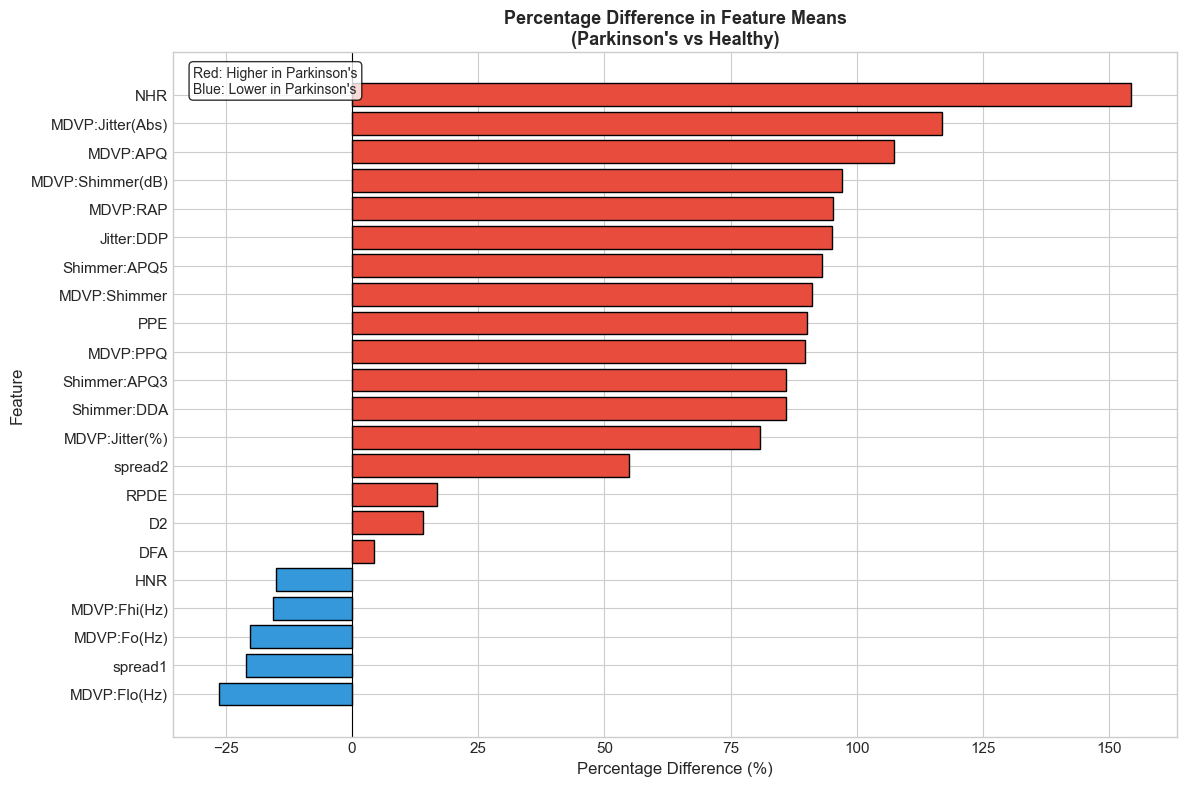

Figure saved: EDA_05_percentage_difference.png


In [15]:
# Visualize the percentage difference between groups
plt.figure(figsize=(12, 8))

# Sort by absolute percentage difference for better visualization
sorted_comparison = comparison_table.sort_values('Pct_Difference')

colors = ['#e74c3c' if x > 0 else '#3498db' for x in sorted_comparison['Pct_Difference']]

plt.barh(sorted_comparison['Feature'], sorted_comparison['Pct_Difference'], color=colors, edgecolor='black')
plt.xlabel('Percentage Difference (%)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Percentage Difference in Feature Means\n(Parkinson\'s vs Healthy)', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Add annotation
plt.text(0.02, 0.98, 'Red: Higher in Parkinson\'s\nBlue: Lower in Parkinson\'s', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('EDA_05_percentage_difference.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_05_percentage_difference.png")

---
## 6. Correlation Analysis
---

Correlation analysis examines the strength and direction of linear relationships between variables. This analysis helps identify which features are strongly related to each other and to the target variable.

### 6.1 Correlation Matrix

In [16]:
# Calculate correlation matrix
correlation_matrix = df.corr()

print("Correlation Matrix:")
print("="*80)
correlation_matrix.round(3)

Correlation Matrix:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.0000,0.4010,0.5970,-0.1180,-0.3820,-0.0760,-0.1120,-0.0760,-0.0980,-0.0740,-0.0950,-0.0710,-0.0780,-0.0950,-0.0220,0.0590,-0.3840,-0.3840,-0.4460,-0.4140,-0.2490,0.1780,-0.3720
MDVP:Fhi(Hz),0.4010,1.0000,0.0850,0.1020,-0.0290,0.0970,0.0910,0.0970,0.0020,0.0430,-0.0040,-0.0100,0.0050,-0.0040,0.1640,-0.0250,-0.1660,-0.1120,-0.3430,-0.0770,-0.0030,0.1760,-0.0700
MDVP:Flo(Hz),0.5970,0.0850,1.0000,-0.1400,-0.2780,-0.1010,-0.0960,-0.1000,-0.1450,-0.1190,-0.1510,-0.1010,-0.1070,-0.1510,-0.1090,0.2110,-0.3800,-0.4000,-0.0500,-0.3950,-0.2440,-0.1010,-0.3400
MDVP:Jitter(%),-0.1180,0.1020,-0.1400,1.0000,0.9360,0.9900,0.9740,0.9900,0.7690,0.8040,0.7470,0.7260,0.7580,0.7470,0.9070,-0.7280,0.2780,0.3610,0.0990,0.6940,0.3850,0.4330,0.7220
MDVP:Jitter(Abs),-0.3820,-0.0290,-0.2780,0.9360,1.0000,0.9230,0.8980,0.9230,0.7030,0.7170,0.6970,0.6490,0.6490,0.6970,0.8350,-0.6570,0.3390,0.4420,0.1750,0.7360,0.3890,0.3110,0.7480
MDVP:RAP,-0.0760,0.0970,-0.1010,0.9900,0.9230,1.0000,0.9570,1.0000,0.7600,0.7910,0.7450,0.7100,0.7370,0.7450,0.9200,-0.7220,0.2670,0.3420,0.0640,0.6480,0.3240,0.4270,0.6710
MDVP:PPQ,-0.1120,0.0910,-0.0960,0.9740,0.8980,0.9570,1.0000,0.9570,0.7980,0.8390,0.7640,0.7870,0.8040,0.7640,0.8450,-0.7320,0.2890,0.3330,0.1960,0.7160,0.4080,0.4130,0.7700
Jitter:DDP,-0.0760,0.0970,-0.1000,0.9900,0.9230,1.0000,0.9570,1.0000,0.7600,0.7910,0.7450,0.7100,0.7370,0.7450,0.9200,-0.7210,0.2670,0.3420,0.0640,0.6480,0.3240,0.4270,0.6710
MDVP:Shimmer,-0.0980,0.0020,-0.1450,0.7690,0.7030,0.7600,0.7980,0.7600,1.0000,0.9870,0.9880,0.9830,0.9500,0.9880,0.7220,-0.8350,0.3670,0.4470,0.1600,0.6550,0.4520,0.5070,0.6940
MDVP:Shimmer(dB),-0.0740,0.0430,-0.1190,0.8040,0.7170,0.7910,0.8390,0.7910,0.9870,1.0000,0.9630,0.9740,0.9610,0.9630,0.7440,-0.8280,0.3510,0.4110,0.1650,0.6530,0.4540,0.5120,0.6950


### 6.2 Correlation Heatmap

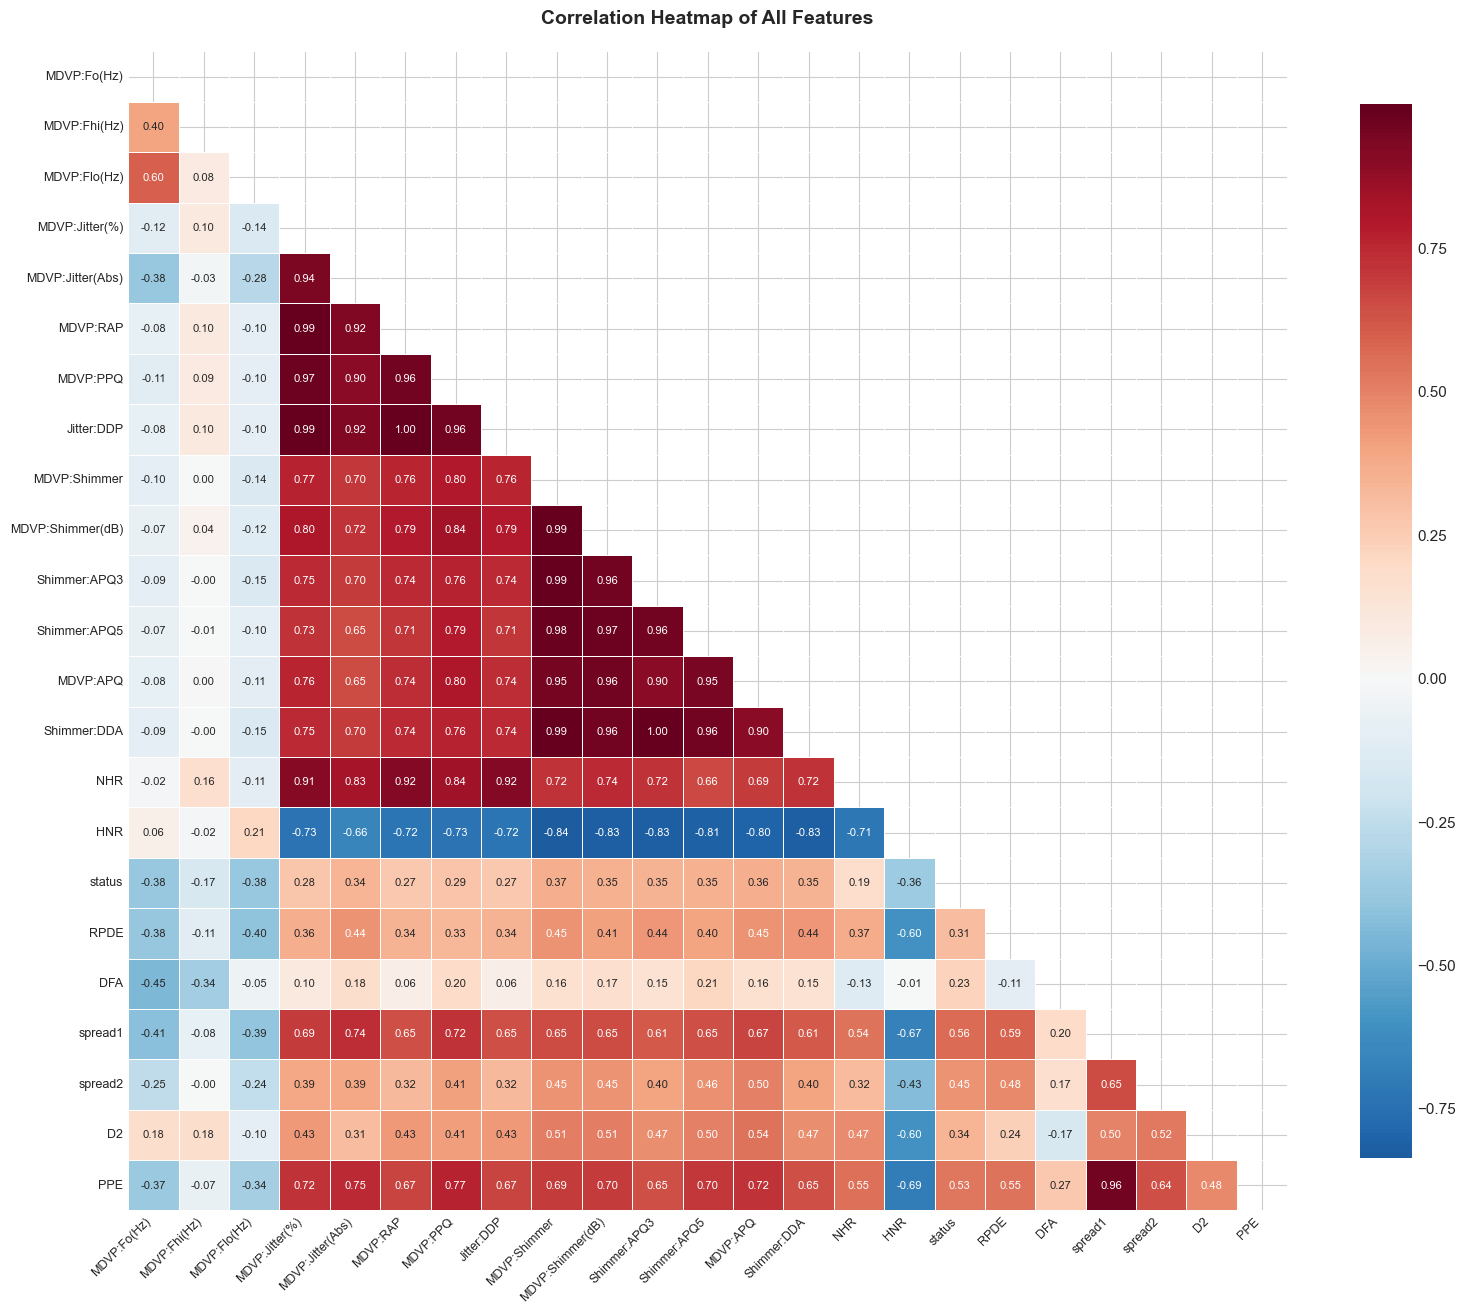

Figure saved: EDA_06_correlation_heatmap.png


In [17]:
# Create correlation heatmap
plt.figure(figsize=(16, 14))

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})

plt.title('Correlation Heatmap of All Features', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('EDA_06_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_06_correlation_heatmap.png")

### 6.3 Correlation with Target Variable

In [18]:
# Extract correlations with the target variable (status)
target_correlation = correlation_matrix['status'].drop('status').sort_values(key=abs, ascending=False)

print("Feature Correlations with Target Variable (status):")
print("="*60)
print("\nPositive correlation: Higher values associated with Parkinson's")
print("Negative correlation: Lower values associated with Parkinson's")
print("\n")

for feature, corr in target_correlation.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{feature:25s}: {corr:+.4f} ({strength} {direction})")

Feature Correlations with Target Variable (status):

Positive correlation: Higher values associated with Parkinson's
Negative correlation: Lower values associated with Parkinson's


spread1                  : +0.5648 (Strong Positive)
PPE                      : +0.5310 (Strong Positive)
spread2                  : +0.4548 (Moderate Positive)
MDVP:Fo(Hz)              : -0.3835 (Moderate Negative)
MDVP:Flo(Hz)             : -0.3802 (Moderate Negative)
MDVP:Shimmer             : +0.3674 (Moderate Positive)
MDVP:APQ                 : +0.3643 (Moderate Positive)
HNR                      : -0.3615 (Moderate Negative)
Shimmer:APQ5             : +0.3511 (Moderate Positive)
MDVP:Shimmer(dB)         : +0.3507 (Moderate Positive)
Shimmer:APQ3             : +0.3476 (Moderate Positive)
Shimmer:DDA              : +0.3476 (Moderate Positive)
D2                       : +0.3402 (Moderate Positive)
MDVP:Jitter(Abs)         : +0.3387 (Moderate Positive)
RPDE                     : +0.3086 (Moderate Positiv

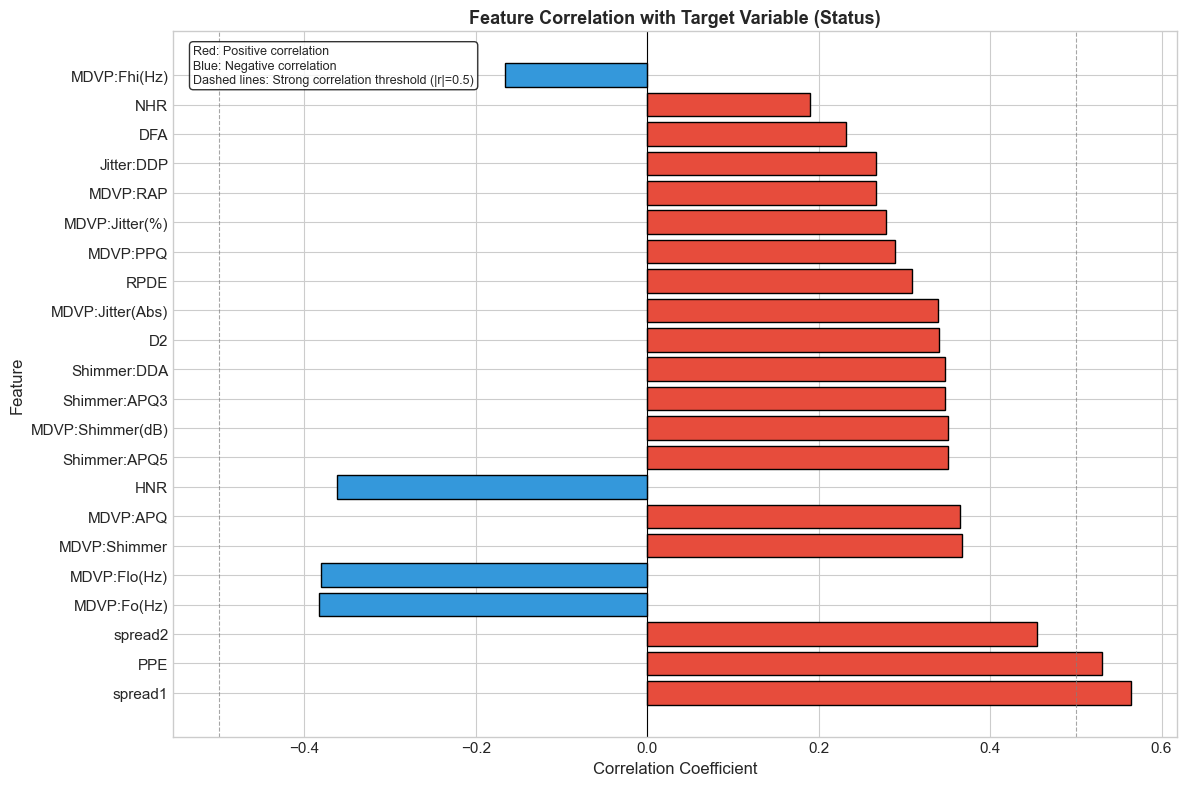

Figure saved: EDA_07_target_correlation.png


In [19]:
# Visualize correlation with target variable
plt.figure(figsize=(12, 8))

colors = ['#e74c3c' if x > 0 else '#3498db' for x in target_correlation.values]

plt.barh(range(len(target_correlation)), target_correlation.values, color=colors, edgecolor='black')
plt.yticks(range(len(target_correlation)), target_correlation.index)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Correlation with Target Variable (Status)', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axvline(x=-0.5, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

# Add annotation
plt.text(0.02, 0.98, 'Red: Positive correlation\nBlue: Negative correlation\nDashed lines: Strong correlation threshold (|r|=0.5)', 
         transform=plt.gca().transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('EDA_07_target_correlation.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_07_target_correlation.png")

### 6.4 Highly Correlated Feature Pairs

In [20]:
# Identify highly correlated feature pairs (excluding self-correlation)
def get_highly_correlated_pairs(corr_matrix, threshold=0.8):
    pairs = []
    cols = corr_matrix.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                pairs.append({
                    'Feature_1': cols[i],
                    'Feature_2': cols[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    return pd.DataFrame(pairs).sort_values('Correlation', key=abs, ascending=False)

high_corr_pairs = get_highly_correlated_pairs(correlation_matrix, threshold=0.8)

print("Highly Correlated Feature Pairs (|r| >= 0.8):")
print("="*70)
if len(high_corr_pairs) > 0:
    print(high_corr_pairs.to_string(index=False))
else:
    print("No feature pairs found with correlation >= 0.8")

Highly Correlated Feature Pairs (|r| >= 0.8):
       Feature_1        Feature_2  Correlation
    Shimmer:APQ3      Shimmer:DDA       1.0000
        MDVP:RAP       Jitter:DDP       1.0000
  MDVP:Jitter(%)       Jitter:DDP       0.9903
  MDVP:Jitter(%)         MDVP:RAP       0.9903
    MDVP:Shimmer      Shimmer:DDA       0.9876
    MDVP:Shimmer     Shimmer:APQ3       0.9876
    MDVP:Shimmer MDVP:Shimmer(dB)       0.9873
    MDVP:Shimmer     Shimmer:APQ5       0.9828
  MDVP:Jitter(%)         MDVP:PPQ       0.9743
MDVP:Shimmer(dB)     Shimmer:APQ5       0.9738
MDVP:Shimmer(dB)      Shimmer:DDA       0.9632
MDVP:Shimmer(dB)     Shimmer:APQ3       0.9632
         spread1              PPE       0.9624
MDVP:Shimmer(dB)         MDVP:APQ       0.9610
    Shimmer:APQ5      Shimmer:DDA       0.9601
    Shimmer:APQ3     Shimmer:APQ5       0.9601
        MDVP:PPQ       Jitter:DDP       0.9573
        MDVP:RAP         MDVP:PPQ       0.9573
    MDVP:Shimmer         MDVP:APQ       0.9501
    Shimmer:AP

### 6.5 Scatter Plot Matrix for Key Features

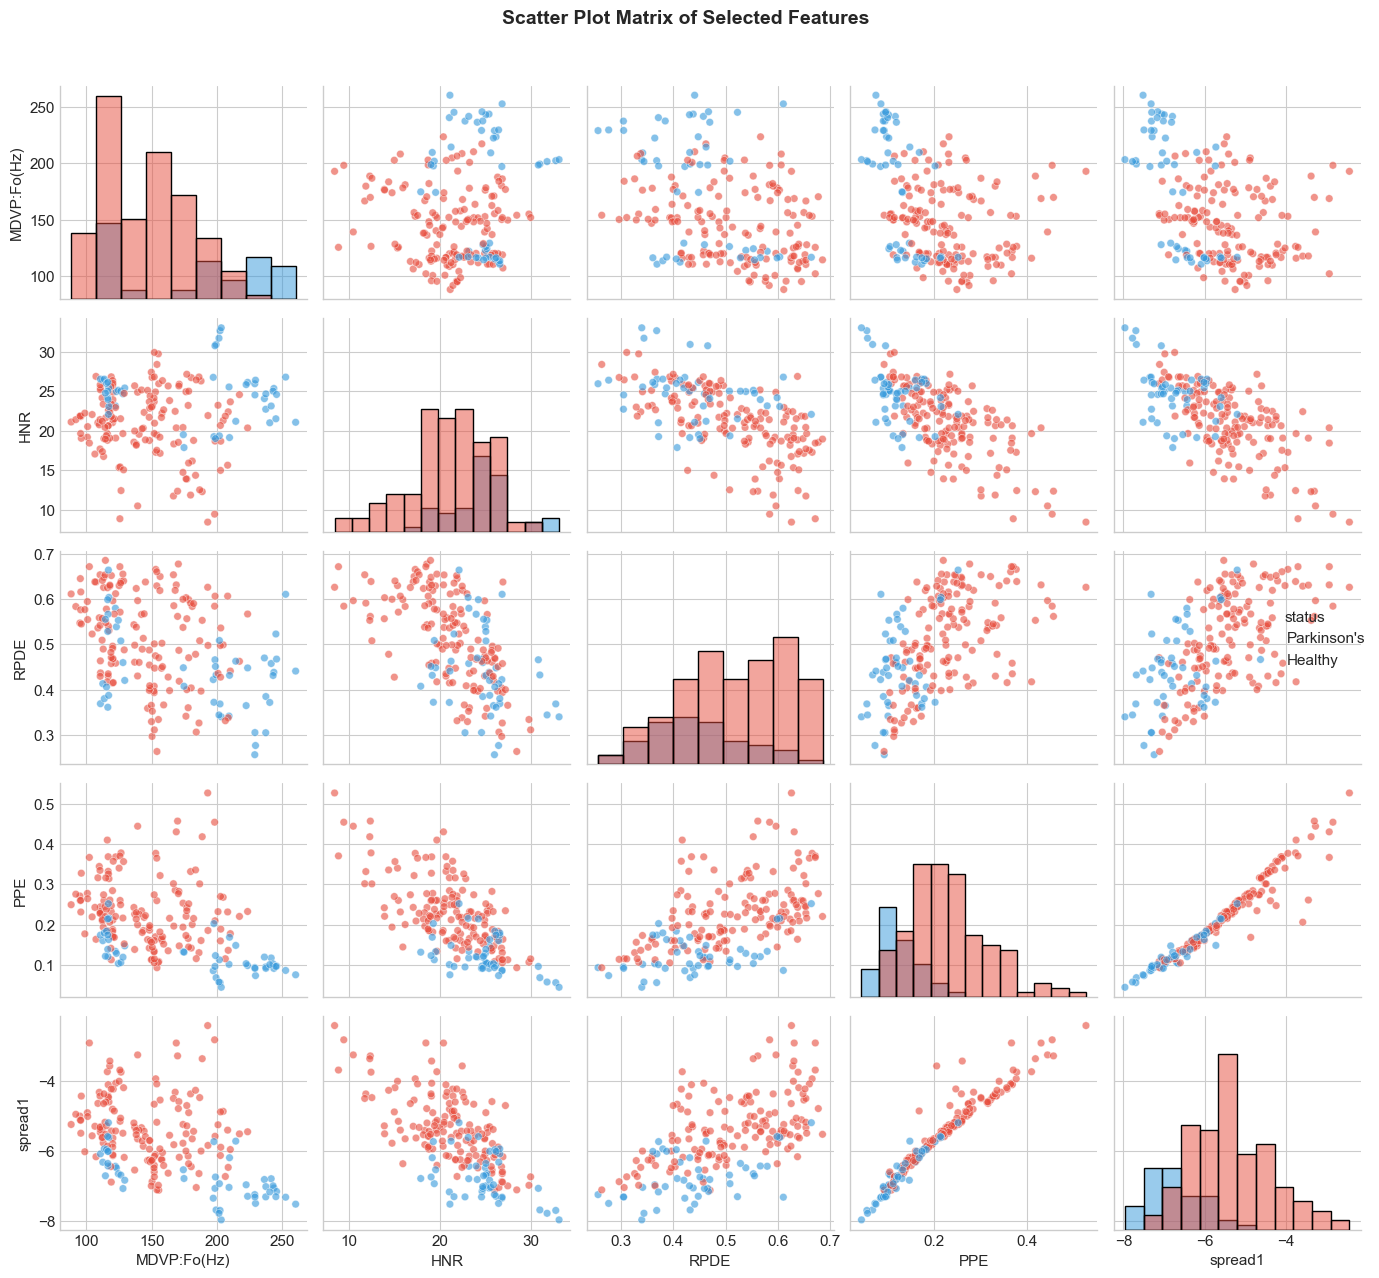

Figure saved: EDA_08_scatter_matrix.png


In [21]:
# Create scatter plot matrix for selected features
selected_features_for_scatter = ['MDVP:Fo(Hz)', 'HNR', 'RPDE', 'PPE', 'spread1']

scatter_data = df[selected_features_for_scatter + ['status']].copy()
scatter_data['status'] = scatter_data['status'].map({0: 'Healthy', 1: "Parkinson's"})

g = sns.pairplot(scatter_data, hue='status', palette={'Healthy': '#3498db', "Parkinson's": '#e74c3c'},
                 diag_kind='hist', plot_kws={'alpha': 0.6, 's': 30})
g.fig.suptitle('Scatter Plot Matrix of Selected Features', y=1.02, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('EDA_08_scatter_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_08_scatter_matrix.png")

---
## 7. ANOVA Test
---

Analysis of Variance (ANOVA) is a statistical method used to determine whether there are statistically significant differences between the means of two or more groups. In this analysis, we apply one-way ANOVA to test whether each feature exhibits significant differences between healthy subjects and those with Parkinson's disease.

**Hypotheses:**
- Null Hypothesis (H0): There is no significant difference in the feature means between groups
- Alternative Hypothesis (H1): There is a significant difference in the feature means between groups

**Significance Level:** alpha = 0.05

In [22]:
# Perform ANOVA test for each feature
anova_results = []
alpha = 0.05

for feature in features:
    # Get data for each group
    group_healthy = df_healthy[feature]
    group_parkinsons = df_parkinsons[feature]
    
    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(group_healthy, group_parkinsons)
    
    # Determine significance
    is_significant = "Yes" if p_value < alpha else "No"
    
    anova_results.append({
        'Feature': feature,
        'F_Statistic': f_statistic,
        'P_Value': p_value,
        'Significant': is_significant
    })

anova_df = pd.DataFrame(anova_results).sort_values('P_Value')

print("ANOVA Test Results:")
print("="*80)
print(f"Significance Level (alpha): {alpha}")
print(f"\nIf P-Value < {alpha}, the difference is statistically significant.")
print("\n")
anova_df.round(6)

ANOVA Test Results:
Significance Level (alpha): 0.05

If P-Value < 0.05, the difference is statistically significant.




,Feature,F_Statistic,P_Value,Significant
18,spread1,90.4242,0.0000,Yes
21,PPE,75.8032,0.0000,Yes
19,spread2,50.3432,0.0000,Yes
0,MDVP:Fo(Hz),33.2866,0.0000,Yes
2,MDVP:Flo(Hz),32.6129,0.0000,Yes
8,MDVP:Shimmer,30.1226,0.0000,Yes
12,MDVP:APQ,29.5363,0.0000,Yes
15,HNR,29.0159,0.0000,Yes
11,Shimmer:APQ5,27.1450,0.0000,Yes
9,MDVP:Shimmer(dB),27.0655,0.0000,Yes


In [23]:
# Summary of ANOVA results
significant_features = anova_df[anova_df['Significant'] == 'Yes']['Feature'].tolist()
non_significant_features = anova_df[anova_df['Significant'] == 'No']['Feature'].tolist()

print("Summary of ANOVA Results:")
print("="*60)
print(f"\nTotal features tested: {len(features)}")
print(f"Statistically significant features: {len(significant_features)}")
print(f"Non-significant features: {len(non_significant_features)}")

print(f"\nFeatures with significant differences (p < {alpha}):")
for i, feature in enumerate(significant_features, 1):
    p_val = anova_df[anova_df['Feature'] == feature]['P_Value'].values[0]
    print(f"  {i:2d}. {feature} (p = {p_val:.2e})")

if non_significant_features:
    print(f"\nFeatures without significant differences (p >= {alpha}):")
    for feature in non_significant_features:
        p_val = anova_df[anova_df['Feature'] == feature]['P_Value'].values[0]
        print(f"   - {feature} (p = {p_val:.4f})")

Summary of ANOVA Results:

Total features tested: 22
Statistically significant features: 22
Non-significant features: 0

Features with significant differences (p < 0.05):
   1. spread1 (p = 7.91e-18)
   2. PPE (p = 1.39e-15)
   3. spread2 (p = 2.39e-11)
   4. MDVP:Fo(Hz) (p = 3.12e-08)
   5. MDVP:Flo(Hz) (p = 4.20e-08)
   6. MDVP:Shimmer (p = 1.26e-07)
   7. MDVP:APQ (p = 1.64e-07)
   8. HNR (p = 2.07e-07)
   9. Shimmer:APQ5 (p = 4.82e-07)
  10. MDVP:Shimmer(dB) (p = 5.00e-07)
  11. Shimmer:APQ3 (p = 6.39e-07)
  12. Shimmer:DDA (p = 6.39e-07)
  13. D2 (p = 1.14e-06)
  14. MDVP:Jitter(Abs) (p = 1.28e-06)
  15. RPDE (p = 1.14e-05)
  16. MDVP:PPQ (p = 4.26e-05)
  17. MDVP:Jitter(%) (p = 8.21e-05)
  18. MDVP:RAP (p = 1.64e-04)
  19. Jitter:DDP (p = 1.65e-04)
  20. DFA (p = 1.12e-03)
  21. NHR (p = 7.99e-03)
  22. MDVP:Fhi(Hz) (p = 2.03e-02)


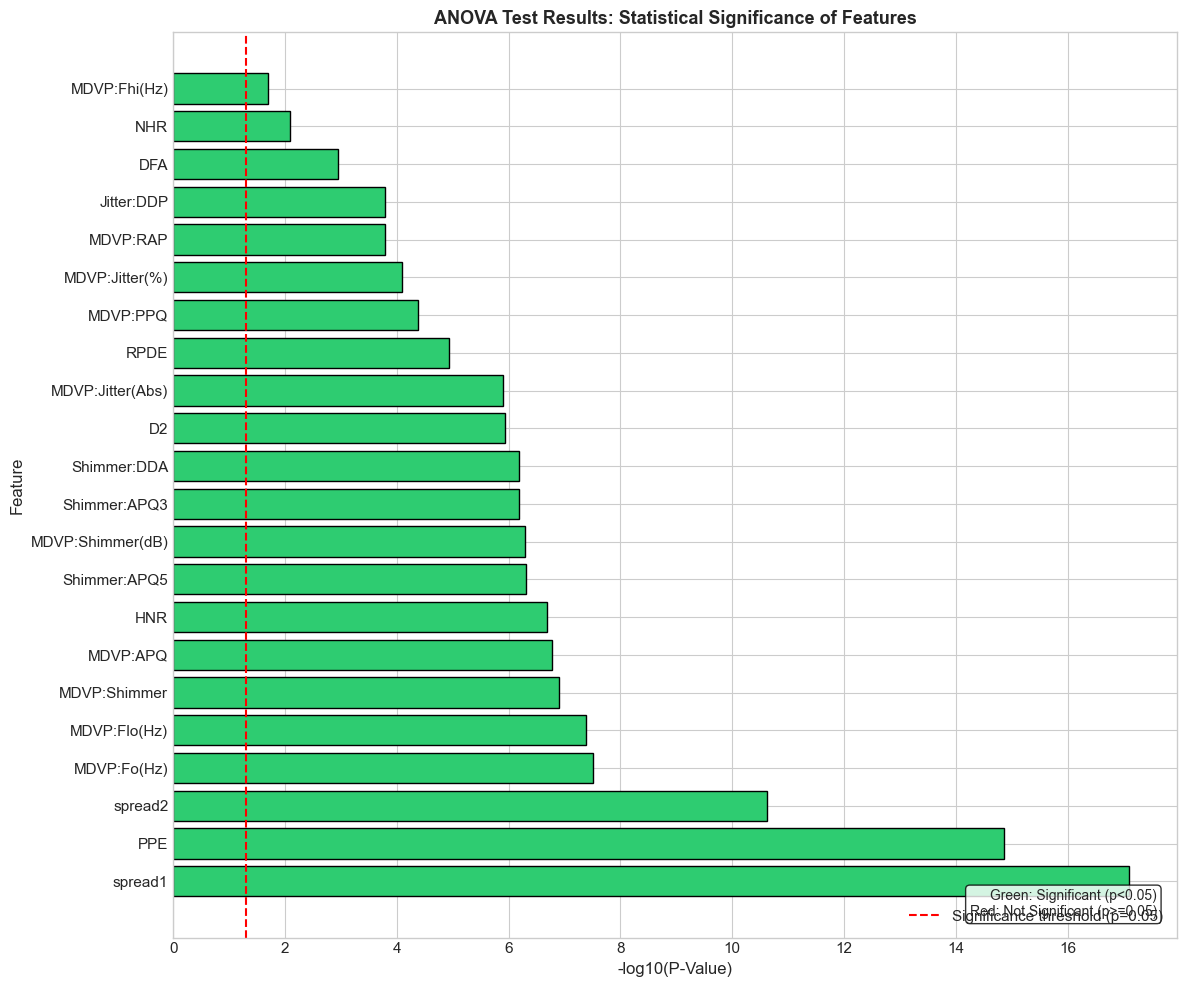

Figure saved: EDA_09_anova_results.png


In [24]:
# Visualize ANOVA p-values
plt.figure(figsize=(12, 10))

# Sort by p-value for visualization
anova_sorted = anova_df.sort_values('P_Value')

# Create colors based on significance
colors = ['#2ecc71' if p < alpha else '#e74c3c' for p in anova_sorted['P_Value']]

# Plot -log10(p-value) for better visualization
log_pvalues = -np.log10(anova_sorted['P_Value'].clip(lower=1e-50))

plt.barh(range(len(anova_sorted)), log_pvalues, color=colors, edgecolor='black')
plt.yticks(range(len(anova_sorted)), anova_sorted['Feature'])
plt.xlabel('-log10(P-Value)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('ANOVA Test Results: Statistical Significance of Features', fontsize=13, fontweight='bold')

# Add significance threshold line
significance_line = -np.log10(alpha)
plt.axvline(x=significance_line, color='red', linestyle='--', linewidth=1.5, label=f'Significance threshold (p={alpha})')

# Add annotation
plt.text(0.98, 0.02, 'Green: Significant (p<0.05)\nRed: Not Significant (p>=0.05)', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('EDA_09_anova_results.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: EDA_09_anova_results.png")

### 7.2 Independent Samples T-Test

As a complementary analysis, we perform independent samples t-tests to compare the means of each feature between the two groups.

In [25]:
# Perform t-tests for each feature
ttest_results = []

for feature in features:
    group_healthy = df_healthy[feature]
    group_parkinsons = df_parkinsons[feature]
    
    # Perform independent samples t-test
    t_statistic, p_value = ttest_ind(group_healthy, group_parkinsons)
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(group_healthy)-1)*group_healthy.std()**2 + 
                          (len(group_parkinsons)-1)*group_parkinsons.std()**2) / 
                         (len(group_healthy) + len(group_parkinsons) - 2))
    cohens_d = (group_parkinsons.mean() - group_healthy.mean()) / pooled_std if pooled_std != 0 else 0
    
    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect_interpretation = "Negligible"
    elif abs(cohens_d) < 0.5:
        effect_interpretation = "Small"
    elif abs(cohens_d) < 0.8:
        effect_interpretation = "Medium"
    else:
        effect_interpretation = "Large"
    
    is_significant = "Yes" if p_value < alpha else "No"
    
    ttest_results.append({
        'Feature': feature,
        'T_Statistic': t_statistic,
        'P_Value': p_value,
        'Cohens_d': cohens_d,
        'Effect_Size': effect_interpretation,
        'Significant': is_significant
    })

ttest_df = pd.DataFrame(ttest_results).sort_values('P_Value')

print("Independent Samples T-Test Results with Effect Size:")
print("="*80)
ttest_df.round(4)

Independent Samples T-Test Results with Effect Size:


,Feature,T_Statistic,P_Value,Cohens_d,Effect_Size,Significant
18,spread1,-9.5092,0.0000,1.5808,Large,Yes
21,PPE,-8.7065,0.0000,1.4474,Large,Yes
19,spread2,-7.0953,0.0000,1.1795,Large,Yes
0,MDVP:Fo(Hz),5.7695,0.0000,-0.9591,Large,Yes
2,MDVP:Flo(Hz),5.7108,0.0000,-0.9494,Large,Yes
8,MDVP:Shimmer,-5.4884,0.0000,0.9124,Large,Yes
12,MDVP:APQ,-5.4347,0.0000,0.9035,Large,Yes
15,HNR,5.3866,0.0000,-0.8955,Large,Yes
11,Shimmer:APQ5,-5.2101,0.0000,0.8661,Large,Yes
9,MDVP:Shimmer(dB),-5.2024,0.0000,0.8649,Large,Yes


---
## 8. Key Findings and Conclusion
---

In [26]:
# Generate summary of key findings
print("="*80)
print("                        KEY FINDINGS AND CONCLUSION")
print("="*80)

print("""
1. DATASET OVERVIEW
   - Total samples: 195 voice recordings
   - Features: 22 voice measurement attributes
   - Target variable: status (0 = Healthy, 1 = Parkinson's)
   - Class distribution: 147 Parkinson's (75.4%) vs 48 Healthy (24.6%)
   - The dataset exhibits class imbalance with approximately 3:1 ratio

2. DESCRIPTIVE STATISTICS
   - All features are numerical with no missing values
   - Several features show notable differences in mean values between groups
   - Features related to jitter, shimmer, and spread show higher values
     in Parkinson's patients compared to healthy subjects
   - HNR (Harmonics-to-Noise Ratio) is lower in Parkinson's patients,
     indicating poorer voice quality

3. CORRELATION ANALYSIS""")

# Get top 5 features correlated with target
top_correlated = target_correlation.head(5)
print("   Top 5 features most correlated with Parkinson's disease:")
for i, (feature, corr) in enumerate(top_correlated.items(), 1):
    print(f"     {i}. {feature}: r = {corr:.4f}")

print(f"""
   - Multiple features show strong correlation with the target variable
   - High multicollinearity exists among jitter-related features
   - High multicollinearity exists among shimmer-related features

4. ANOVA RESULTS
   - {len(significant_features)} out of {len(features)} features show statistically
     significant differences between groups (p < 0.05)
   - Most voice measurement features are effective discriminators
     between healthy and Parkinson's subjects

5. IMPLICATIONS FOR MODEL DEVELOPMENT
   - Feature selection may be beneficial due to high multicollinearity
   - Class imbalance should be addressed during model training
   - The statistically significant features should be prioritized
   - Cross-validation is recommended to ensure model generalizability

6. CONCLUSION
   The exploratory data analysis reveals that voice measurements contain
   discriminative information for detecting Parkinson's disease. The
   significant differences observed between groups, combined with strong
   correlations with the target variable, suggest that machine learning
   models can effectively utilize these features for classification.
   The next step involves developing and evaluating various machine
   learning algorithms to build an accurate predictive model.
""")

print("="*80)
print("                        END OF PROGRESS 3")
print("="*80)

                        KEY FINDINGS AND CONCLUSION

1. DATASET OVERVIEW
   - Total samples: 195 voice recordings
   - Features: 22 voice measurement attributes
   - Target variable: status (0 = Healthy, 1 = Parkinson's)
   - Class distribution: 147 Parkinson's (75.4%) vs 48 Healthy (24.6%)
   - The dataset exhibits class imbalance with approximately 3:1 ratio

2. DESCRIPTIVE STATISTICS
   - All features are numerical with no missing values
   - Several features show notable differences in mean values between groups
   - Features related to jitter, shimmer, and spread show higher values
     in Parkinson's patients compared to healthy subjects
   - HNR (Harmonics-to-Noise Ratio) is lower in Parkinson's patients,
     indicating poorer voice quality

3. CORRELATION ANALYSIS
   Top 5 features most correlated with Parkinson's disease:
     1. spread1: r = 0.5648
     2. PPE: r = 0.5310
     3. spread2: r = 0.4548
     4. MDVP:Fo(Hz): r = -0.3835
     5. MDVP:Flo(Hz): r = -0.3802

   - Mul

---
## List of Generated Figures

1. EDA_01_target_distribution.png - Distribution of disease status
2. EDA_02_feature_distributions.png - Histograms of key features by group
3. EDA_03_boxplots.png - Box plots of key features by group
4. EDA_04_violinplots.png - Violin plots of selected features
5. EDA_05_percentage_difference.png - Percentage difference in feature means
6. EDA_06_correlation_heatmap.png - Full correlation heatmap
7. EDA_07_target_correlation.png - Feature correlations with target
8. EDA_08_scatter_matrix.png - Scatter plot matrix of selected features
9. EDA_09_anova_results.png - ANOVA test results visualization